<h1> Pendulum Waves </h1>
<br> </br><body> 
    <p> Upon first attempt, I calculated the pendula lengths with discrete increments of some finite value. Upon observation though, this does not reveal the pendulum wave patterns desired. For that, each pendulum must have an integer multiple number of oscillations in a full pendulum wave period. If the longest pendulum makes 10 oscillations in the total period of the system, then the other n pendula must make 10 + 1, 10 + 2, 10 +3, ... 10 + n, oscillations in the same time period to reveal the desired pattern.
    </p>
    </br>
    <p> To calculate the pendula lengths for N pendula, I assumed a small angle approximation so that
    
    $$T = 2\pi \sqrt{\frac{l}{g}}$$ . Now if the total period is $T_{tot}$, then 
    <br> </br>
    <br>  </br>
    $$T = \frac{T_{tot}}{N+n}$$ where N is the number of oscillations of the largest pendulum and n is the number of the nth pendulum. Setting these equal and solving for the length gives the lambda function included in the code below. 
    
    $$l(n) = g(\frac{T_{tot}}{2\pi(N + n)})^2$$
    </p>
    
    <p> In order to create a parabolic length pattern, I used the formula  
        $$l(n) = g(\frac{T_{tot}}{2\pi(N + n^{2})})^2$$
        
        </p>
        <p>
        And created an array of pendulum lengths iterating from -n/2 to n/2. The head on view, however, only shows half of the pendulum because the other half are exactly the same and perfectly overlap.

    </p>
    
    
    <p> As a side note, the total period is set to 60 seconds, so around 60 seconds the entire pattern should restart </p>
    

</body>

<IPython.core.display.Javascript object>


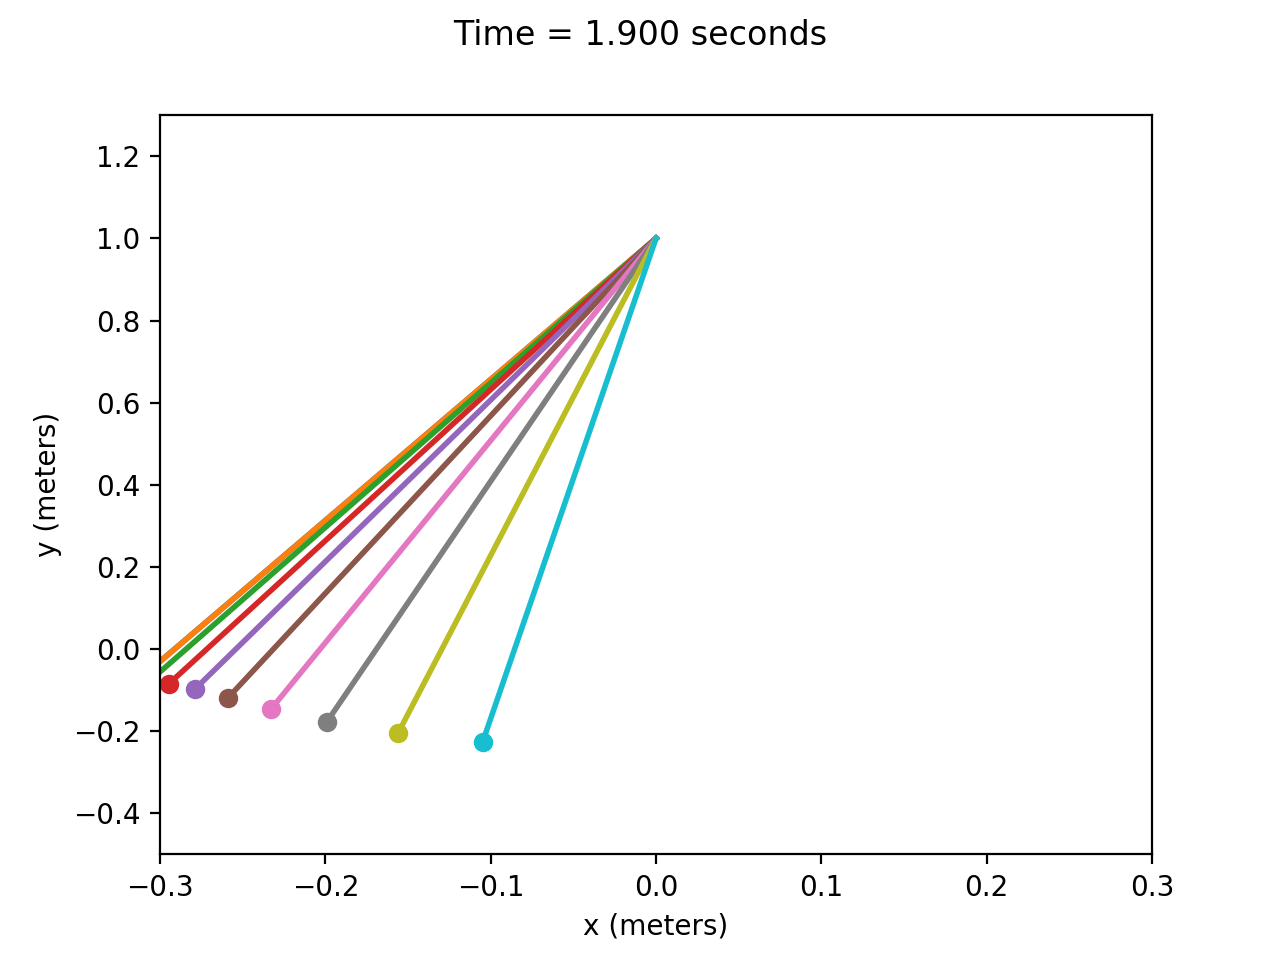

In [2]:
import math
from math import pi
import numpy as np
from numpy import sin, cos
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import animation 
%matplotlib notebook

#Add a button choosing a linear or parabolic length scheme

#Parameters

N = 10 #No of Pendulums

g = 9.81 #m/s/s

time = np.arange(0, 100.0, 0.025) #time step of 25 ms, 100/.025 total time steps


#dynamically calculate lengths for arbitrary # of pendulums
#assuming small angle approximation

l = []
duration = 60
maxOscils = 51

length = lambda n: 9.81 * (duration / (2*pi*(maxOscils + n)))**2

for n in range(N):
    l.append(length(n))


# length = lambda n: 9.81 * (duration / (2*pi*(maxOscils + (n)**2)))**2

# for n in range(-N/2,N/2):
#     l.append(length(n))
    


# define equations
def equations(y0, t):
    theta, x = y0
    f = [x, -(g/l[j])*sin(theta)]
    return(f)


# initial conditions
initial_angle = 75.0
theta0 = np.radians(initial_angle)
x0 = np.radians(0.0)

# find the solution using odeint
theta1 = []
for j in range(N):
    theta1.append(odeint(equations, [theta0,x0], time))


# Create an empty figure in which we will plot
fig, (ax1) = plt.subplots(1,1)
fig.suptitle("Time = 0 seconds", fontsize=12)
ax1.set_xlim(-.3, .3)
ax1.set_ylim(-.5, 1.3)
ax1.set_xlabel("x (meters)")
ax1.set_ylabel("y (meters)")
ax1.set_aspect('auto')

# Create N point objects and N line objects
points = ax1.plot( *([[], []]*N), marker="o")
lines = ax1.plot(*([[], []]*N), lw=2)


# Initialize the point and line objects    
def init():
    for j in range(N):
        points[j].set_data([], [])
        lines[j].set_data([],[])
    return(points)


# Update the plot
def update(n):  # n = frame counter
    i = n % 100000
    fig.suptitle("Time = {:.3f} seconds".format(round(time[i], 3)), fontsize=12)

    for j in range(N):
        
        points[j].set_data(l[j] * sin(theta1[j][i][0]), -l[j] * cos(theta1[j][i][0]))
        lines[j].set_data([0, l[j] * sin(theta1[j][i][0])],[1,-l[j] * cos(theta1[j][i][0])])
        
    plt.show()
        
ani = animation.FuncAnimation(fig, update, init_func=init, frames=100000, interval=50)
plt.show()

